In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import statsmodels.api as sm
#still might need to check on which patients are in dff but missing from the 37633 Unique patient IDs
dff = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/model_agent.csv')
exp3 = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/AB_testing/ind_mod_results.csv')
exp4 = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/AB_testing/patient_ab_results4.csv')

In [3]:
list(exp3['Health_Camp_ID'].unique)

TypeError: 'method' object is not iterable

In [ ]:
'''
- What are the most important factors at each camp location? 
- Are there any patterns among the patients that are incorrectly labeled
  among the camp_IDs?
- **Patterns among patients that all models incorrectly predict 
- **If an avg proba or other bandit would do better
- **
'''

In [2]:
pat = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/patient_df.csv')
xg = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/testing/x2.csv')

In [3]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/ready12_24_train.csv') 


In [4]:
exp3.columns
from preprocessing import *

In [5]:
corrMatrix = exp3[['Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'y_target', 'Camp Length', 'BFSI', 'Broadcasting', 'Consulting',
       'Education', 'Food', 'Health', 'Manufacturing', 'Others', 'Real Estate',
       'Retail', 'Software Industry', 'Technology', 'Telecom', 'Transport',
       'A', 'C', 'D', 'E', 'F', 'G', 'Second', 'Third', '1', '2', '3', '4',
       'Patient_ID', 'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date']]

In [6]:
cm = corrMatrix.corr()
cm.style.background_gradient(cmap='coolwarm')

,Var1,Var2,Var3,Var4,Var5,y_target,Camp Length,BFSI,Broadcasting,Consulting,Education,Food,Health,Manufacturing,Others,Real Estate,Retail,Software Industry,Technology,Telecom,Transport,A,C,D,E,F,G,Second,Third,1,2,3,4,Patient_ID,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date
Var1,1.000000,0.822243,0.342685,0.370567,0.752112,0.046380,-0.033563,0.039633,-0.003829,0.016641,0.086963,0.020835,-0.001480,0.004627,0.014339,0.007825,0.000824,0.034029,0.030579,0.003928,0.005177,-0.001073,0.005222,0.001245,0.031029,-0.026930,-0.007106,-0.000238,-0.007106,0.063715,0.060252,0.026356,0.046929,-0.022162,0.026548,0.124557,0.170349,-0.008599
Var2,0.822243,1.000000,0.665241,0.339064,0.688243,0.034008,-0.022951,0.023899,-0.002660,0.001046,0.083693,0.002948,-0.003829,-0.001381,-0.000310,-0.001170,0.000433,0.059119,0.003851,0.000891,0.000698,0.001350,0.001005,-0.003599,0.022823,-0.017644,-0.005976,-0.000855,-0.005976,0.030083,0.040049,0.007734,0.064351,-0.025476,0.015804,0.082712,0.111537,-0.007905
Var3,0.342685,0.665241,1.000000,0.196725,0.367535,0.015341,-0.006230,-0.002022,-0.000945,-0.003239,0.020948,-0.001206,-0.001470,-0.001569,-0.003331,-0.001328,-0.001602,0.085978,-0.000888,-0.001147,-0.001323,0.003990,0.003481,-0.004619,0.002156,-0.002872,-0.001497,0.000893,-0.001497,0.000370,-0.003746,-0.003245,0.027580,-0.021858,0.002215,0.036026,0.044533,-0.003933
Var4,0.370567,0.339064,0.196725,1.000000,0.496241,0.033001,-0.033674,0.043613,0.012257,0.021156,0.031443,0.041275,0.003740,0.016456,-0.002386,0.017583,-0.000477,0.042251,0.037939,0.022623,0.017722,0.006193,-0.007061,-0.000196,0.025130,-0.031754,0.002260,0.005351,0.002260,0.022757,0.035962,0.039879,0.027238,-0.001884,0.030193,0.149267,0.202737,-0.005565
Var5,0.752112,0.688243,0.367535,0.496241,1.000000,0.065312,-0.064328,0.052470,-0.000131,0.062691,0.069870,0.044188,0.007524,0.021309,0.036703,0.016972,0.009986,0.070692,0.068385,0.013146,0.021056,-0.001623,0.003200,0.001109,0.060917,-0.054980,-0.010445,-0.000801,-0.010445,0.089222,0.092302,0.082787,0.067303,-0.019714,0.047229,0.222483,0.304110,-0.019630
y_target,0.046380,0.034008,0.015341,0.033001,0.065312,1.000000,-0.021504,0.019991,-0.002108,0.020619,0.024130,0.002202,0.006606,0.001911,0.027790,0.012857,0.010680,0.020334,0.031982,0.003629,0.009763,0.208967,0.015971,0.166600,-0.236995,-0.236514,0.324856,0.279040,0.324856,0.036241,0.044186,0.026639,0.015530,-0.009297,0.070309,0.044857,0.114024,0.040388
Camp Length,-0.033563,-0.022951,-0.006230,-0.033674,-0.064328,-0.021504,1.000000,-0.027934,-0.009288,-0.049917,-0.034478,-0.018967,-0.021242,-0.031432,-0.045617,-0.022638,-0.019627,-0.057124,-0.057946,-0.018098,-0.019220,0.054360,-0.054900,-0.090509,-0.424908,0.633518,-0.222612,-0.003515,-0.222612,-0.032634,-0.037569,-0.031013,-0.019929,-0.005936,-0.384188,0.040940,-0.284718,0.606542
BFSI,0.039633,0.023899,-0.002022,0.043613,0.052470,0.019991,-0.027934,1.000000,-0.005256,-0.018023,-0.013056,-0.006708,-0.008177,-0.008731,-0.018537,-0.007391,-0.008913,-0.019026,-0.023527,-0.006382,-0.007360,-0.004816,0.003885,0.005684,0.008105,-0.017456,-0.006804,-0.001016,-0.006804,0.071424,0.018477,0.039335,-0.007604,0.007669,0.011808,0.044139,0.062447,-0.016017
Broadcasting,-0.003829,-0.002660,-0.000945,0.012257,-0.000131,-0.002108,-0.009288,-0.005256,1.000000,-0.008418,-0.006098,-0.003133,-0.003819,-0.004078,-0.008658,-0.003452,-0.004163,-0.008886,-0.010989,-0.002981,-0.003438,0.000827,0.002890,-0.003678,0.002782,-0.007571,-0.004067,-0.001362,-0.004067,-0.006207,0.049259,-0.003495,0.026402,0.002560,0.003382,0.000406,0.003413,-0.005794
Consulting,0.016641,0.001046,-0.003239,0.021156,0.062691,0.020619,-0.049917,-0.018023,-0.008418,1.000000,-0.020911,-0.010744,-0.013097,-0.013983,-0.029688,-0.011837,-0.014275,-0.030471,-0.037680,-0.010221,-0.011787,-0.011342,0.002632,0.007970,0.020304,-0.029156,-0.012793,-0.005472,-0.012793,0.107282,0.080316,0.059763,-0.007120,0.016076

In [7]:
# records=df_withID.groupby(['City_Type2_x','Health_Camp_ID']).apply(lambda x: x).to_dict("records") 
get = np.array( zip(df_withID['City_Type2_x'], df_withID['Health_Camp_ID'].values)  )

In [8]:
featdf = scale(corrMatrix )

/home/allen/Galva/capstones/capstone2/Notebooks/preprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = i_i
/home/allen/Galva/capstones/capstone2/Notebooks/preprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = i_i
/home/allen/Galva/capstones/capstone2/Notebooks/preprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [9]:
featdf_ = featdf.drop(['Patient_ID'], axis=1)
y = featdf_.pop('y_target')
X = featdf_

[[12358  1093]
 [ 2209  2920]]


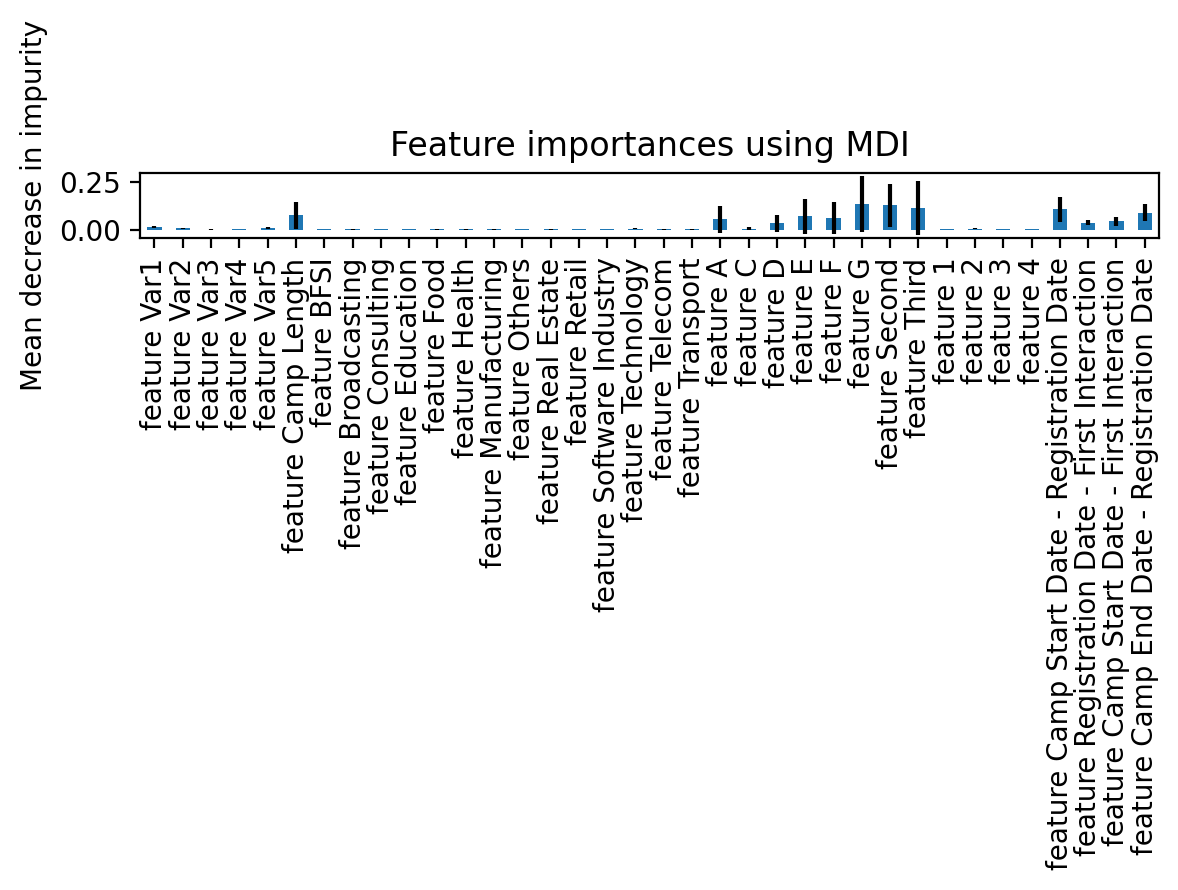

In [23]:

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, random_state=42)
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train4,y_train4)
rfc_preds = rfc.predict(X_test4)
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test4,rfc_preds)) 

feature_names = [f'feature {i}' for i in X_train4.columns ]
importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

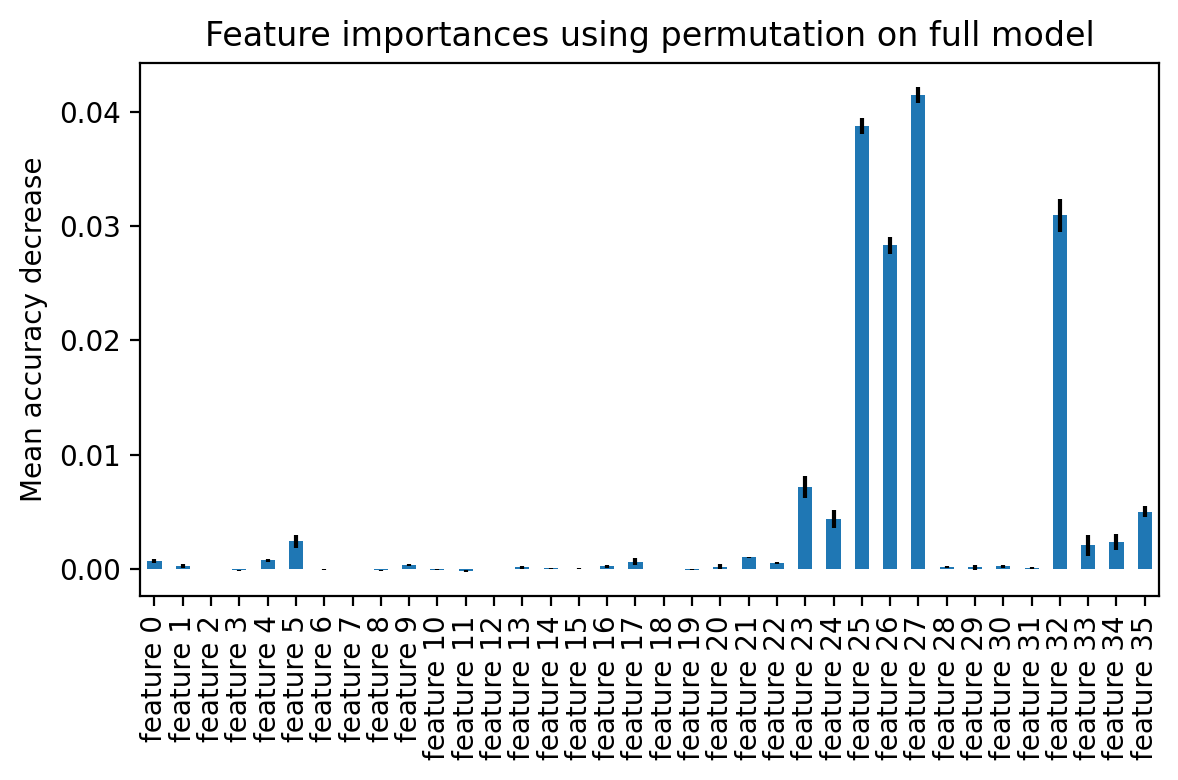

In [15]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rfc, X_test4, y_test4, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


In [22]:
nums = [(i,ii) for i,ii in enumerate(X.columns)]
print(nums[23:28 ])
print(nums[32:])

[(23, 'E'), (24, 'F'), (25, 'G'), (26, 'Second'), (27, 'Third')]
[(32, 'Camp Start Date - Registration Date'), (33, 'Registration Date - First Interaction'), (34, 'Camp Start Date - First Interaction'), (35, 'Camp End Date - Registration Date')]


In [31]:
t = {}
for col,val in list(zip(forest_importances)):
    t[item]=item
print(t)

{0.011673316529190292: 0.011673316529190292, 0.006555052548702389: 0.006555052548702389, 0.00013360465714391646: 0.00013360465714391646, 0.0017600813822551131: 0.0017600813822551131, 0.010172537000493868: 0.010172537000493868, 0.07368558250701984: 0.07368558250701984, 0.0010640800924199005: 0.0010640800924199005, 0.0003170222384585777: 0.0003170222384585777, 0.0017946041431373008: 0.0017946041431373008, 0.0015053472977837818: 0.0015053472977837818, 0.0005797140204424237: 0.0005797140204424237, 0.0007525992488358286: 0.0007525992488358286, 0.0006229787092752757: 0.0006229787092752757, 0.0023518923975093292: 0.0023518923975093292, 0.0005646801633921257: 0.0005646801633921257, 0.0009354631956775918: 0.0009354631956775918, 0.0024862089518042463: 0.0024862089518042463, 0.00416959057429419: 0.00416959057429419, 0.00032153269919341684: 0.00032153269919341684, 0.0007024145527193033: 0.0007024145527193033, 0.053566393805491185: 0.053566393805491185, 0.005221502469333365: 0.005221502469333365, 0

In [ ]:
df_withID['Tups'] = list(zip(df_withID.City_Type2_x,df_withID.Health_Camp_ID))

In [ ]:
df_withID['Tups2'] = list(zip(df_withID['Camp Length'].values,df_withID.Health_Camp_ID))

In [ ]:
d2={}
for i in df_withID['Tups2'].values:
    key = i[1]
    value = i[0]
    if key not in d2.keys():
        d2[key]=value

In [ ]:
d2_counts={}
for i in d2.values():
    if i not in d2_counts:
        d2_counts[i]=1
    else:
        d2_counts[i]+=1
print(sorted(d2_counts.items()))

In [ ]:
cat2={}
city={}
jobs={}

for i in df_withID['City_Type2_x'].values:
    if i not in city:
        city[i]=1
    else:
        city[i]+=1

for ii in df_withID['Category 2'].values:
    if ii not in cat2:
        cat2[ii]=1
    else:
        cat2[ii]+=1
for iii in df_withID['Job Type_x'].values:
    if iii not in jobs:
        jobs[iii]=1
    else:
        jobs[iii]+=1
        
print(cat2.values(), '*******cat2')
print(city.values(), 'CITY')
print(jobs.values(), 'JOBs')

In [ ]:
dff.describe()
dff['Success'] = dff['Y_target_SUM'].apply(lambda x:4 if x == 0 else x) 

-It seems like I should change the nature of Y_count_allModels and Y-Target_SUM 
*** Rational would be that I don't Only care about Y-Target I  also care about Model Success

-So The update should be :

create 'Success_count' 


%% Can you stack lambda functions? - Like create a series of them

%%Note to self and use in interview - realized my model was incomplete in a certain sense | Success was attendance, success for me/models was correct predction.


In [ ]:
# g = sns.relplot(data=dff, x='proba_xg', y='proba_s2',hue= 'y_target', palette="deep", kind='scatter', col="prediction_k2", col_wrap=2)
# plt.legend(loc='best')
# plt.title('S2 vs XG Probas')

In [ ]:
sns.stripplot(x='Y_target_SUM', y='proba_sVC', hue='y_target', data=dff, jitter=True)

In [ ]:

g1 = sns.relplot(data=dff, x='prediction_xg', y ='proba_xg' ,hue= 'y_target', palette="deep" )
# g2 = sns.relplot(data=dff, x='prediction_kNN', y ='proba_kNN' ,hue= 'y_target', palette="deep" )
# g3 = sns.relplot(data=dff, x='prediction_xg', y ='proba_xg' ,hue= 'y_target', palette="deep" )
plt.legend(loc='best')
plt.title('XG Boost Probabilities & Actual Attendance')
plt.figure(figsize=(6, 6))
#make a 4 plot of these to put into readme

In [ ]:
# sns.relplot(data=dff,x=['prediction_sVC','prediction_xg' ], y = ['proba_sVC', 'proba_xg'], hue="y_target")


In [ ]:
'''
Need to append IDs to k2,s2
create new col from ids.values

*new idea, create a series of functions to
make a new dataframe.

-rename cols to reflect model type:
knn_proba, knn_prediction , sv_ , xg_

-want to know:
similar among 3
difference among 3

-visualize the above ? compare heatmaps 

assign network or cluster based on Location
or break the graph below into location

assign colors:
overlap - incorrect White/Black
overlap - correct
partial1 ab : Green: light = False, Dark = True
partial2 bc : Blue : light = False, Dark = True
partial3 ac : Yellow: light = False, Dark = True

lambda functions, mapping, 

Want to know if correct-
want to know who it was correct-

'''

In [ ]:
#Update 4/27 Outline for compare_model.py functions 

'''
def change_cols(xg,knn,svc): 
    cols_to_change=[prediction, Proba]
    return df 
    
def combine(xg,knn,svc):
    add the two to one <4/27 migth indiacte to add 
                       < either of those 2 and then add the 2_single set to the One
    
def edit(new_df):
    could do a sum across rows for y_predict value ,0,1,2,3
    if its a 2 then check for ac,ab,bc
    if its a 1 then check for a,b,c 
    assign letter or number based on 1-6
    
def graph(new_df):
    

'''

In [ ]:
k = k2['prediction'].values
s = s2['prediction'].values
lst = list(zip(k,s))
lstK = list(zip(k,noid))
lstS = list(zip(noid,s))

In [ ]:
acum_s_k=0
acum_b_k=0
acum_b_s=0

for i in lst:
    if i[0] == i[1]:
        acum_s_k+=1
print(acum_s_k)

for i in lstK:
    if i[0] == i[1]:
        acum_b_k+=1
print(acum_b_k)

for i in lstS:
    if i[0] == i[1]:
        acum_b_s+=1
print(acum_b_s)


In [ ]:
#sns.stripplot(x='Prediction_Score2', y='proba_k2', hue='y_target', data=dff, jitter=True)
from preprocessing import *

In [ ]:
df2 = a.copy()

In [ ]:
def happen2(df ,lst):
    '''
    Create y-score column 
    for each column , create new column based on y_target + column Score
    apply lambda to each column and check if its == 2 
    '''
    for col in lst: # create a new column which is y_target + model_prediction score
        df['and_'+col] = df['y_target'] + df[col] 

    for col in lst: # if y_target + model_prediction score match 
        df['and_'+col] = df['and_'+col].apply(lambda x: 2 if x ==0 else x) 

    for col in lst: # now this score reflects if the model was correct and not if model choose a 1
        col_ = col + '_score'
        df[col_] = df['and_'+col].apply(lambda x: 1 if x == 2  else 0  )

    df['score'] = df['SVC_score']+df['log_score']+df['knn_score'] 
    #can now check for y_target = 0  and model score = 0  ~ Ho
    #can now check for y_target = 0  and model score = 3 ~ Ha 
    #now its low model scores and y= 0 / y =1 

    return df 

In [ ]:
df2s = happen2(df2,lst= ['SVC','knn','log'])

In [ ]:
df_all = dff.copy()
df_ind = a.copy() 
df = dff.copy()

In [ ]:
surprise_go_ho = df2s[(df2s['y_target'] == 1) & (df2s['score'] == 3)]
surprise_go_ha = df2s[(df2s['y_target'] == 1) & (df2s['score'] == 0)]
print(len(surprise_go_ha), '<---This was HA', len(surprise_go_ho), 'this was HO')

surprise_NO_ho = df2s[(df2s['y_target'] == 0) & (df2s['score'] == 0)]
surprise_NO_ha = df2s[(df2s['y_target'] == 0) & (df2s['score'] == 3)]
print(len(surprise_NO_ha), '<---This was HA', len(surprise_NO_ho), 'this was HO')

In [ ]:
#surprise_go_ho[surprise_go_ho['Health_Camp_ID', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Camp Length', 'BFSI']]
print(str(surprise_go_ho.columns[0:10]))

In [ ]:
start = 0
end = 10

for i in range(5) :

    get = list(a.columns)
    get_cols = get[start:end]
    if i >=1:
        get_cols.append('y_target')
    print(get_cols)
    sns.pairplot(a[get_cols], hue = 'y_target')
    start+=10
    end+=10

In [ ]:
def happen(df ):
    
    lst = [ 'prediction_kNN', 'prediction', 'prediction_sVC', 'prediction_xg' ]

    for col in lst:
         
        df['and_'+col] = dff['y_target'] + dff[col]
        
    for col in lst:
        df['and_'+col] = df['and_'+col].apply(lambda x: 2 if x ==0 else x) 
    for col in lst:
        col_ = col + '_score'
        df[col_] = df['and_'+col].apply(lambda x: 1 if x == 2  else 0  )
    
    df['Score'] = df['prediction_kNN_score']+ df['prediction_score'] +df['prediction_sVC_score'] + df['prediction_xg_score'] 
    
    return df

In [ ]:
a_ = happen(df)

#df_al = happen(df_all)
#df_in = happen(df_ind,lst = ['SVC','knn','log'])

In [ ]:
df 

In [ ]:
 
a2 = a_.drop(['Unnamed: 0','proba_kNN', 'prediction_kNN', 'proba_sVC',
       'prediction_sVC', 'proba_xg', 'prediction_xg', 'Y_count_allModels',
       'Y_target_SUM', 'and_prediction_kNN', 'and_prediction',
       'and_prediction_sVC', 'and_prediction_xg', 'prediction_kNN_score',
       'prediction_score', 'prediction_sVC_score', 'prediction_xg_score',
    'Patient_ID', 'prediction', 'Proba',], axis = 1)
print(a_.columns) 
y_target = a_['y_target']

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ncluster_list = range(1,20)

def kmean_score(nclust):
    
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 300) 
                #n_jobs = -1) #look at hyperparameters 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
    km.fit(a2)
    rss = -km.score(a2)
    return rss

scores = [kmean_score(i) for i in range(1,20)]
print("#clust\trss")
for i, score in enumerate(scores):
    print("{0}\t{1:0.0f}".format(ncluster_list[i],score))

In [ ]:
print(a2.columns) 
'''
-drop cols
-create target_variable
'''
y2 = a2.pop('y_target')
y_ = a2.pop('Score')
#dft = dff.drop(['Unnamed: 0','y_target','Y_count_allModels','Y_target_SUM','Patient_ID'], axis=1)

In [ ]:
 
train_test_split(a_, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    a_,y2,test_size = .3, random_state=101)


from sklearn.linear_model import LogisticRegression
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)



predictions = logmodelx.predict_proba(a_)[:,1]
pure_proba = logmodelx.predict(a_)
preds, preds2 = predictions>.5 ,predictions>.55
# for name, coef in zip(preds2[1:], logmodelx.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))
from sklearn.metrics import classification_report
print(classification_report(y2,preds2) ) 
print(classification_report(y2,preds) )  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [ ]:
a_ =a.copy() 

In [ ]:
r = np.zeros(50)

In [ ]:
lst=[1 for x,xx in enumerate(r) if x%2 == 0 ]

In [ ]:
df3 = dff.head()

In [ ]:
df3.to_csv('/home/allen/Galva/capstones/capstone2/data/models_for_git_head.csv')

In [ ]:
surprising3= a_[a_['y_target']==1 & (a_['Score']==0)]
# Where the Person went to a Camp BUT no model predicted they would
print(len(surprising3))

surprising3a= a_[a_['y_target']==1 & (a_['Score']!=0)]
# Where the Person went to a Camp and some model predicted they would
print(len(surprising3a))

# EDA among most surprising agents


In [ ]:
idv0 = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Camp Start Date - Registration Date'] 
idv1= ['Registration Date - First Interaction', 'Camp Start Date - First Interaction' ]
idv2= ['Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third', 'A'] 
idv3= ['C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0'] 
idv4= ['8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2'] 
idv5= ['3', '4', '1036', '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384']

In [ ]:
df0 = dff[[item for item in idv0]]
df0.hist(bins=30)
plt.tight_layout()

In [ ]:
cityz = {}
camp

In [ ]:
Question:
    Among the patients who attended but all the models predicted they would not attend:
        -How many of these?
        -Any patterns? 
    
Question2:
    Among the patients who did NOT attend but all the models predicted they would attend:
        -How many of these?
        -Any Patterns
    

In [ ]:
surprising2= dff[(dff['y_target']==0) & (dff['Y_count_allModels']>=2)]
# Where the person did Not go to a Camp But two models thought they would
print(len(surprising2))

In [ ]:
dff.columns

import itertools as it 

lst = [item for item in dff.columns]
print(lst)

In [ ]:
 #  itertools.combinations(iterable, r)
itered = it.combinations(lst[1:9] , 6)    

In [ ]:
import math
from math import factorial

print(math.factorial(6) / (math.factorial(9)-math.factorial(6) )  ) 

# surprising

In [ ]:
'''
Ho Testing for certain columns to test if significant differences exist among 

sec_ho = dff[dff['y_target'] ==1 ]['Second'].to_numpy()
sec_ha = dff[dff['y_target'] ==0 ]['Second'].to_numpy()

sec_ho_mean = sec_ho.mean()
sec_ha_mean = sec_ha.mean()

ztest(sec_ho_mean,sec_ha_mean)

surprising3= dff[dff['y_target']==1 & (dff['Y_count_allModels']==0)]
# Where the Person went to a Camp BUT no model predicted they would
print(len(surprising3))

surprising3a= dff[dff['y_target']==1 & (dff['Y_count_allModels']!=0)]
# Where the Person went to a Camp and some model predicted they would
print(len(surprising3a))
'''

'''


# Where the Person went to a Camp BUT no model predicted they would
      surprising3= a_[a_['y_target']==1 & (a_['Score']==0)]


# Where the Person went to a Camp and some model predicted they would
      surprising3a= a_[a_['y_target']==1 & (a_['Score']!=0)]



surprise_go_ho = df[(df['y_target'] == 1) & (df['score'] == 3)]
surprise_go_ha = df[(df['y_target'] == 1) & (df['score'] == 0)]
print(len(surprise_go_ha), '<---This was HA', len(surprise_go_ho), 'this was HO')

surprise_NO_ho = df[(df['y_target'] == 0) & (df['score'] == 0)]
surprise_NO_ha = df[(df['y_target'] == 0) & (df['score'] == 3)]
print(len(surprise_NO_ha), '<---This was HA', len(surprise_NO_ho), 'this was HO')

    for i in cols2: 
        ho = surprise_go_ho[i].values
        ha = surprise_go_ha[i].values
        get = ho_testing(ho,ha) 
        
        get1 = round(get[0],3)
        get2 = round(get[1],3)
        print(f'statistic = {get1} p_val --> {get2}, for COI --> {i}',manual_ho_testing(ho,ha) )

'''

In [ ]:
import scipy.stats as stats
def ho_testing(ho,ha):
    '''
    Inputs: x= list of lists   
    output: a p_value 
    ''' 
    
    return stats.ttest_ind(ho,ha,alternative= "two-sided",equal_var =False)

In [ ]:
def manual_ho_testing(ho,ha):
    stan_error = sum(ho) - sum(ha)
    pp = (stan_error)/(len(ho)+len(ha)) #pool_proba
    pool_stan_error = (pp * (1-pp) * (1/( len(ho) +len(ha))**.5 ) )
    return f'stand error -> {round(stan_error,2)} , pooled_proba ->{round(pp,2)}, and pool_error {round(pool_stan_error,2)}'


In [ ]:
cols2 = [
    'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction', 'Success',
       'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third',
       'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729',
       '2517', '2662'
]

In [ ]:
cols=['Second','Third','9999.0', 'Camp Length']
check = []
for i in cols2:
    ho = surprising3a[i].values
    ha = surprising3[i].values
    get = ho_testing(ho,ha) 
    
    get1 = round(get[0],3)
    get2 = round(get[1],3)
    print(f'statistic = {get1} p_val --> {get2}, for COI --> {i}',manual_ho_testing(ho,ha) )
    

In [ ]:
surprising3.head()

In [ ]:
surprising3.columns

In [ ]:
Prediction = # I think is XG 1 prediction
Prediction_Score = # see above
Y_target_SUM = #up to 4
Y_count_allModels = # pred from xg+knn+svc up to 3

# Wanting Y count among all models
# sum (Y Target , all models)
#

In [ ]:
'''
smaller:
[('Second', (0.0005101027299358867, 0.5002035015374943)), ('Third', (0.001746215432479473, 0.5006966388126657)), 
('9999.0', (0.00036383681552966033, 0.5001451498856789)), ('Camp Length', (0.0008299770004436161, 0.5003311128792225))]


'''

In [ ]:
#surprising3['Pred_Score_all_models'].max()
sup3 = surprising3[['y_target', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction']]

In [ ]:
sns.heatmap(sup3, annot='True')

In [ ]:
se =  0.23 -0.11 
pp_ =  0.012 / 2000 
pse =  pp_*(1-pp_) * (1/1000 + 1/1000)**.5  
print(se,pp_,pse)

In [ ]:
0.012/0.00578 